In [1]:
import numpy as np
import matplotlib.pyplot as plt 
# import astropy.units as u

%matplotlib inline
plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 16})

In [122]:
def delay_time(ν, DM): # [MHz], [pc/cm**3]
    constant = 4140
    return (constant*DM)/(ν**2)

## Find the pulse in the mock data

In [174]:
# https://github.com/AaronParsons/astro207/blob/main/pulsar_dispersion/pulsar.dat
data = np.loadtxt('Data/mock_pulsar_data.txt')

In [175]:
times = data[:,0] # 0th column
times.shape

(128,)

In [176]:
power = data[:,1:]
power.shape

(128, 1024)

In [177]:
freqs = np.linspace(1.000, 2.000, power.shape[1]) # GHz
freqs.shape

(1024,)

/tmp/ipykernel_111/3178047112.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(t*np.ones_like(freqs), freqs, c=np.log10(power[i]), s=0.4, cmap='gist_heat')


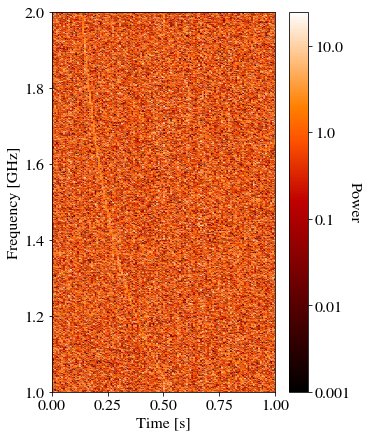

In [178]:
plt.figure(figsize=(5,7))
for i, t in enumerate(times):
    plt.scatter(t*np.ones_like(freqs), freqs, c=np.log10(power[i]), s=0.4, cmap='gist_heat')
cticks=[-3., -2., -1., 0., 1.]
cbar=plt.colorbar(ticks=cticks)
cbar.set_label(label='Power', rotation=270, labelpad=10)
cbar.set_ticklabels([str(t) for t in 10**np.array(cticks)])

plt.xlabel('Time [s]')
plt.ylabel('Frequency [GHz]')
plt.xlim(times[0], times[-1]); plt.ylim(freqs[0], freqs[-1])

plt.show()

/tmp/ipykernel_111/847895266.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130), freqs, c=np.log10(power[i]), s=0.4, cmap='gist_heat')


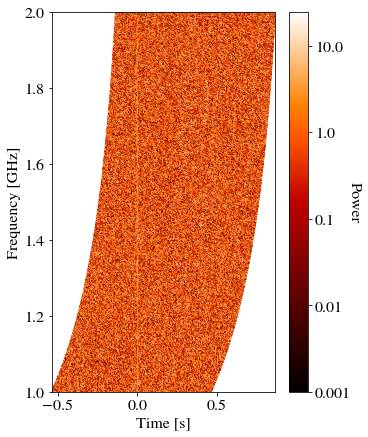

In [179]:
plt.figure(figsize=(5,7))
for i, t in enumerate(times):
#     print(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130))
    plt.scatter(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130), freqs, c=np.log10(power[i]), s=0.4, cmap='gist_heat')
cticks=[-3., -2., -1., 0., 1.]
cbar=plt.colorbar(ticks=cticks)
cbar.set_label(label='Power', rotation=270, labelpad=10)
cbar.set_ticklabels([str(t) for t in 10**np.array(cticks)])

plt.xlabel('Time [s]')
plt.ylabel('Frequency [GHz]')
plt.xlim(times[0]-delay_time(freqs.min()*10**3, 130), times[-1]-delay_time(freqs.max()*10**3, 130))
plt.ylim(freqs[0], freqs[-1])
plt.show()

## Determining frequency resolution limitations

### Number of frequency channels = 512

In [180]:
P = []
for spec in range(len(power)):
    p = np.array([sum(power[spec][i:i+1]) for i in range(0, len(power[spec]), 2)])
    P.append(p)
    
power = np.array(P)
power.shape

(128, 512)

In [181]:
freqs = np.linspace(1.000, 2.000, power.shape[1]) # GHz
freqs.shape

(512,)

/tmp/ipykernel_111/1945318168.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(t*np.ones_like(freqs), freqs, c=np.log10(power[i]), s=1, cmap='gist_heat')


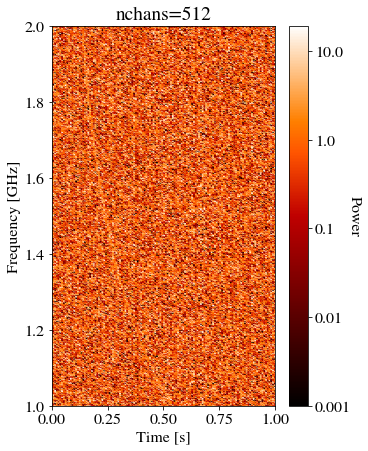

In [182]:
plt.figure(figsize=(5,7))
for i, t in enumerate(times):
    plt.scatter(t*np.ones_like(freqs), freqs, c=np.log10(power[i]), s=1, cmap='gist_heat')
cticks=[-3., -2., -1., 0., 1.]
cbar=plt.colorbar(ticks=cticks)
cbar.set_label(label='Power', rotation=270, labelpad=10)
cbar.set_ticklabels([str(t) for t in 10**np.array(cticks)])

plt.xlabel('Time [s]')
plt.ylabel('Frequency [GHz]')
plt.xlim(times[0], times[-1]); plt.ylim(freqs[0], freqs[-1])
plt.title('nchans=512')

plt.show()

/tmp/ipykernel_111/807004355.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130), freqs, c=np.log10(power[i]), s=1, cmap='gist_heat')


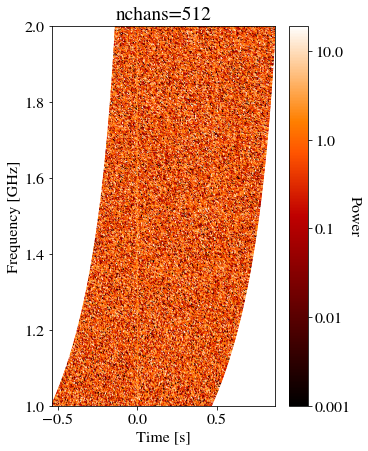

In [183]:
plt.figure(figsize=(5,7))
for i, t in enumerate(times):
#     print(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130))
    plt.scatter(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130), freqs, c=np.log10(power[i]), s=1, cmap='gist_heat')
cticks=[-3., -2., -1., 0., 1.]
cbar=plt.colorbar(ticks=cticks)
cbar.set_label(label='Power', rotation=270, labelpad=10)
cbar.set_ticklabels([str(t) for t in 10**np.array(cticks)])

plt.xlabel('Time [s]')
plt.ylabel('Frequency [GHz]')
plt.xlim(times[0]-delay_time(freqs.min()*10**3, 130), times[-1]-delay_time(freqs.max()*10**3, 130))
plt.ylim(freqs[0], freqs[-1])
plt.title('nchans=512')
plt.show()

### nchans = 256

In [184]:
P = []
for spec in range(len(power)):
    p = np.array([sum(power[spec][i:i+1]) for i in range(0, len(power[spec]), 2)])
    P.append(p)
    
power = np.array(P)
power.shape

(128, 256)

In [185]:
freqs = np.linspace(1.000, 2.000, power.shape[1]) # GHz
freqs.shape

(256,)

/tmp/ipykernel_111/3018388878.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(t*np.ones_like(freqs), freqs, c=np.log10(power[i]), s=3, cmap='gist_heat')


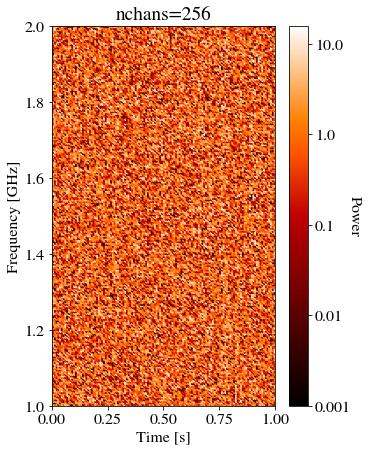

In [186]:
plt.figure(figsize=(5,7))
for i, t in enumerate(times):
    plt.scatter(t*np.ones_like(freqs), freqs, c=np.log10(power[i]), s=3, cmap='gist_heat')
cticks=[-3., -2., -1., 0., 1.]
cbar=plt.colorbar(ticks=cticks)
cbar.set_label(label='Power', rotation=270, labelpad=10)
cbar.set_ticklabels([str(t) for t in 10**np.array(cticks)])

plt.xlabel('Time [s]')
plt.ylabel('Frequency [GHz]')
plt.xlim(times[0], times[-1]); plt.ylim(freqs[0], freqs[-1])
plt.title('nchans=256')
plt.show()

/tmp/ipykernel_111/8946657.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130), freqs, c=np.log10(power[i]), s=3, cmap='gist_heat')


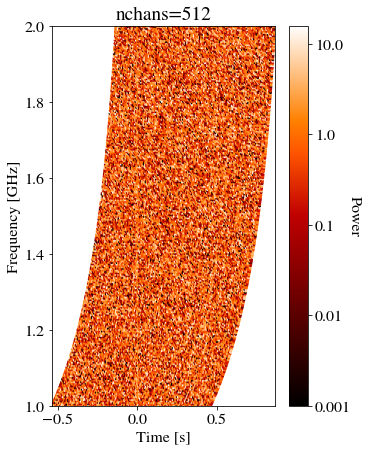

In [187]:
plt.figure(figsize=(5,7))
for i, t in enumerate(times):
#     print(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130))
    plt.scatter(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130), freqs, c=np.log10(power[i]), s=3, cmap='gist_heat')
cticks=[-3., -2., -1., 0., 1.]
cbar=plt.colorbar(ticks=cticks)
cbar.set_label(label='Power', rotation=270, labelpad=10)
cbar.set_ticklabels([str(t) for t in 10**np.array(cticks)])

plt.xlabel('Time [s]')
plt.ylabel('Frequency [GHz]')
plt.xlim(times[0]-delay_time(freqs.min()*10**3, 130), times[-1]-delay_time(freqs.max()*10**3, 130))
plt.ylim(freqs[0], freqs[-1])
plt.title('nchans=512')
plt.show()

### nchans = 128

In [160]:
P = []
for spec in range(len(power)):
    p = np.array([sum(power[spec][i:i+1]) for i in range(0, len(power[spec]), 2)])
    P.append(p)
    
power = np.array(P)
power.shape

(128, 128)

In [161]:
freqs = np.linspace(1.000, 2.000, power.shape[1]) # GHz
freqs.shape

(128,)

/tmp/ipykernel_111/3193134229.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(t*np.ones_like(freqs), freqs, c=np.log10(power[i]), s=10, cmap='gist_heat')


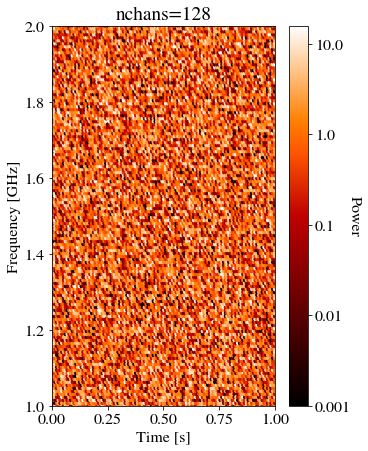

In [172]:
plt.figure(figsize=(5,7))
for i, t in enumerate(times):
    plt.scatter(t*np.ones_like(freqs), freqs, c=np.log10(power[i]), s=10, cmap='gist_heat')
cticks=[-3., -2., -1., 0., 1.]
cbar=plt.colorbar(ticks=cticks)
cbar.set_label(label='Power', rotation=270, labelpad=10)
cbar.set_ticklabels([str(t) for t in 10**np.array(cticks)])

plt.xlabel('Time [s]')
plt.ylabel('Frequency [GHz]')
plt.xlim(times[0], times[-1]); plt.ylim(freqs[0], freqs[-1])
plt.title('nchans=128')
plt.show()

/tmp/ipykernel_111/2722313963.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130), freqs, c=np.log10(power[i]), s=10, cmap='gist_heat')


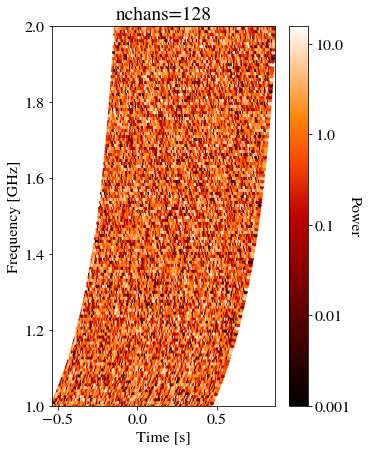

In [173]:
plt.figure(figsize=(5,7))
for i, t in enumerate(times):
#     print(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130))
    plt.scatter(t*np.ones_like(freqs)-delay_time(freqs*10**3, 130), freqs, c=np.log10(power[i]), s=10, cmap='gist_heat')
cticks=[-3., -2., -1., 0., 1.]
cbar=plt.colorbar(ticks=cticks)
cbar.set_label(label='Power', rotation=270, labelpad=10)
cbar.set_ticklabels([str(t) for t in 10**np.array(cticks)])

plt.xlabel('Time [s]')
plt.ylabel('Frequency [GHz]')
plt.xlim(times[0]-delay_time(freqs.min()*10**3, 130), times[-1]-delay_time(freqs.max()*10**3, 130))
plt.ylim(freqs[0], freqs[-1])
plt.title('nchans=128')
plt.show()